In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df_max_temp = pd.read_csv('daily-max-temperatures.csv', index_col='Date', parse_dates=True)

In [36]:
df_max_temp = df_max_temp.ffill()

In [37]:
df_max_temp.sample(15)

,Temperature,cycle_100,trend_100,cycle_1600,trend_1600,cycle_14400,trend_14400
Date,,,,,,,
1982-05-31,12.9,-2.273910,15.173910,-2.293157,15.193157,-2.128614,15.028614
1990-04-07,19.4,-3.745376,23.145376,-3.459349,22.859349,-3.239334,22.639334
1981-06-30,16.3,2.073125,14.226875,2.902764,13.397236,2.830881,13.469119
1982-11-25,17.6,-7.294219,24.894219,-6.363059,23.963059,-6.589051,24.189051
1989-05-04,17.2,-2.504142,19.704142,-2.867345,20.067345,-2.317489,19.517489
1986-07-25,8.2,-4.688501,12.888501,-5.418037,13.618037,-5.561003,13.761003
1988-11-11,31.2,8.068084,23.131916,8.869703,22.330297,9.020855,22.179145
1987-03-08,16.4,-5.280972,21.680972,-5.994134,22.394134,-6.609781,23.009781
1984-03-25,17.5,-4.014448,21.514448,-4.093612,21.593612,-4.291335,21.791335


<Axes: title={'center': 'Daily max temperatures'}, xlabel='Date'>

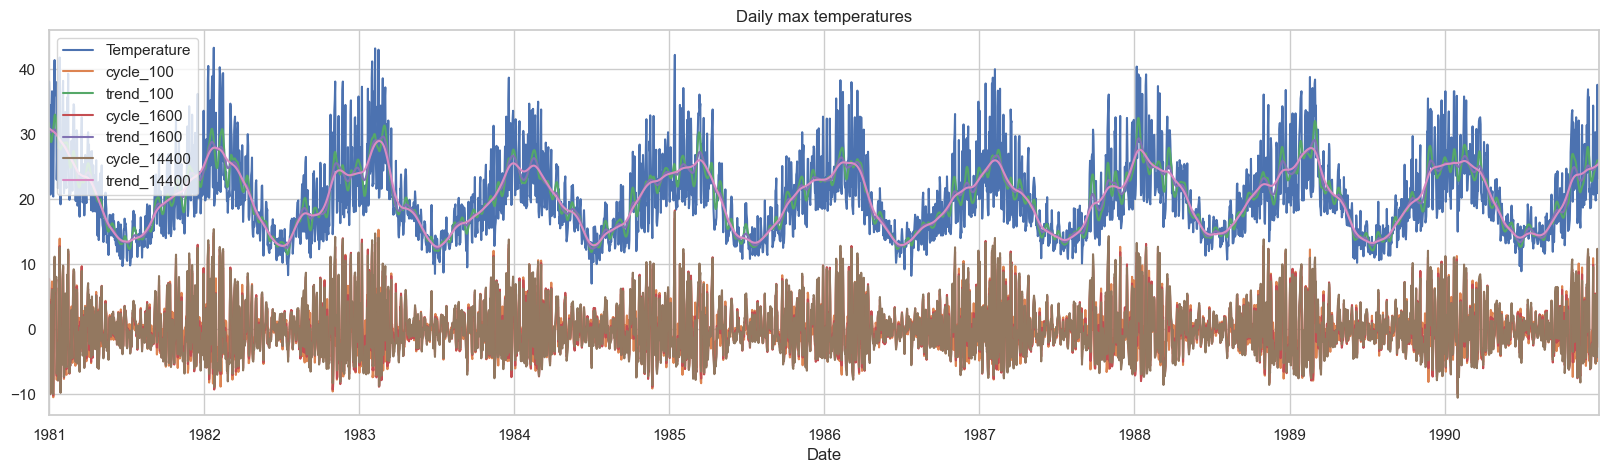

In [46]:
df_max_temp.plot(title='Daily max temperatures', figsize=(20, 5))

# Descomposición de Hodrick-Prescott

[Text(0, 0.5, 'Daily max temperature')]

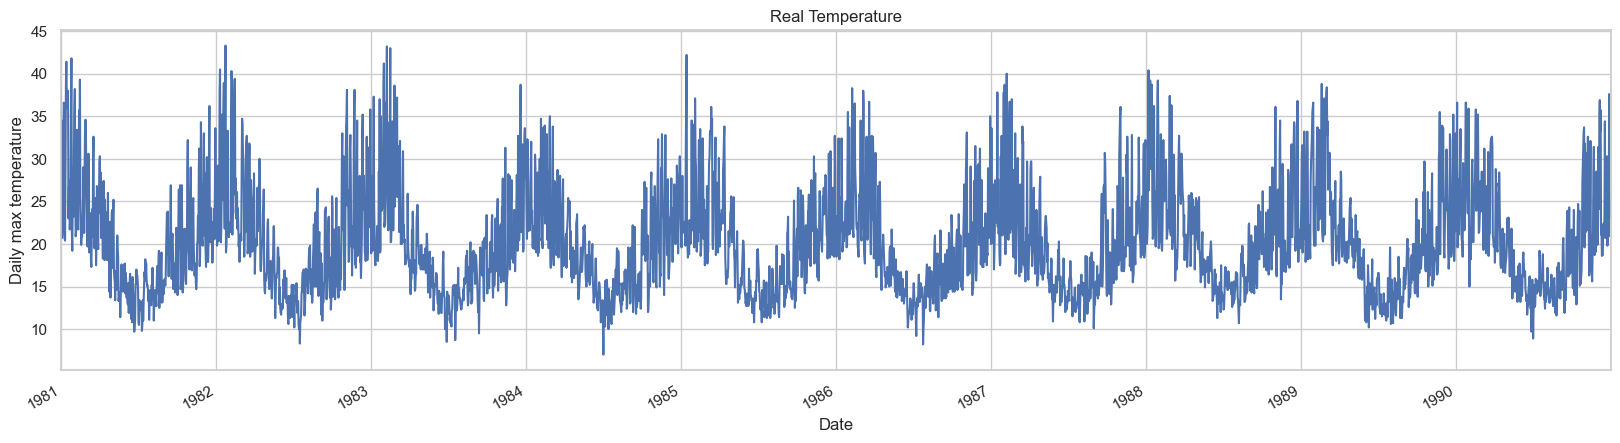

In [8]:
ax = df_max_temp['Temperature'].plot(title='Real Temperature', figsize=(20, 5))
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Daily max temperature')

In [11]:
cycle_100, trend_100 = hpfilter(df_max_temp['Temperature'], lamb=100)
cycle_1600, trend_1600 = hpfilter(df_max_temp['Temperature'], lamb=1600)
cycle_14400, trend_14400 = hpfilter(df_max_temp['Temperature'], lamb=14400)

In [12]:
df_max_temp = df_max_temp.assign(
    cycle_100=cycle_100,
    trend_100=trend_100,
    cycle_1600=cycle_1600,
    trend_1600=trend_1600,
    cycle_14400=cycle_14400,
    trend_14400=trend_14400
)

<Axes: title={'center': 'Daily max temp. vs Trend'}, xlabel='Date'>

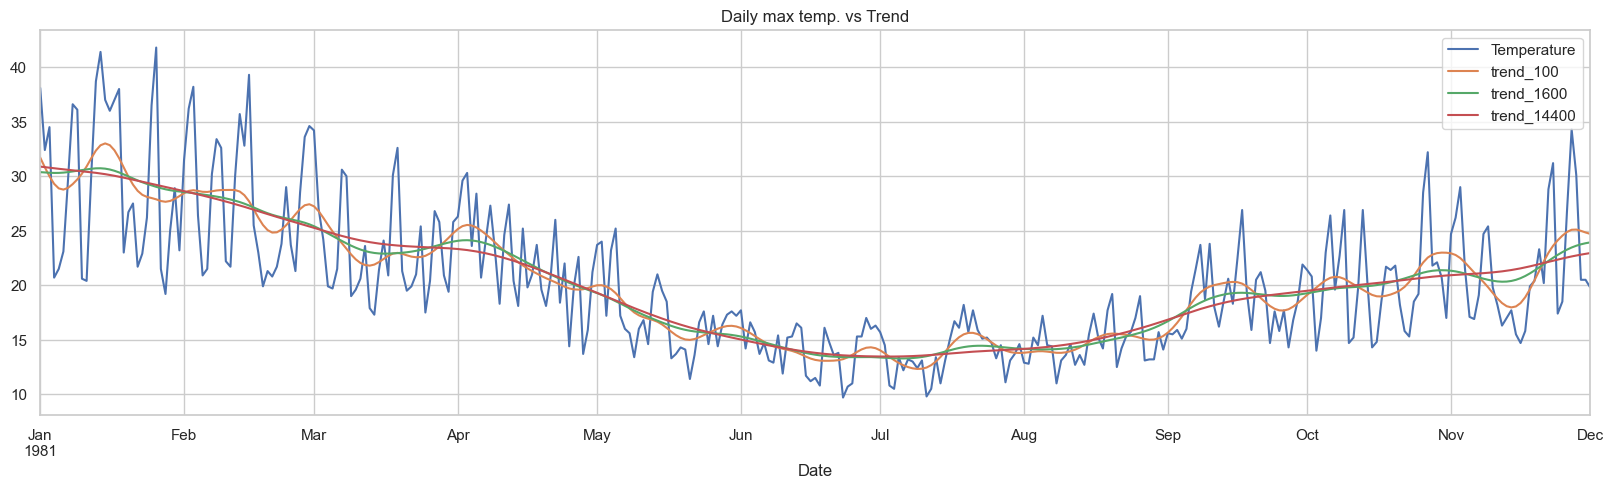

In [55]:
df_max_temp[['Temperature', 'trend_100', 'trend_1600', 'trend_14400']].iloc[:335].plot(title='Daily max temp. vs Trend', figsize=(20, 5))

<Axes: title={'center': 'Daily max temp. vs Cycle'}, xlabel='Date'>

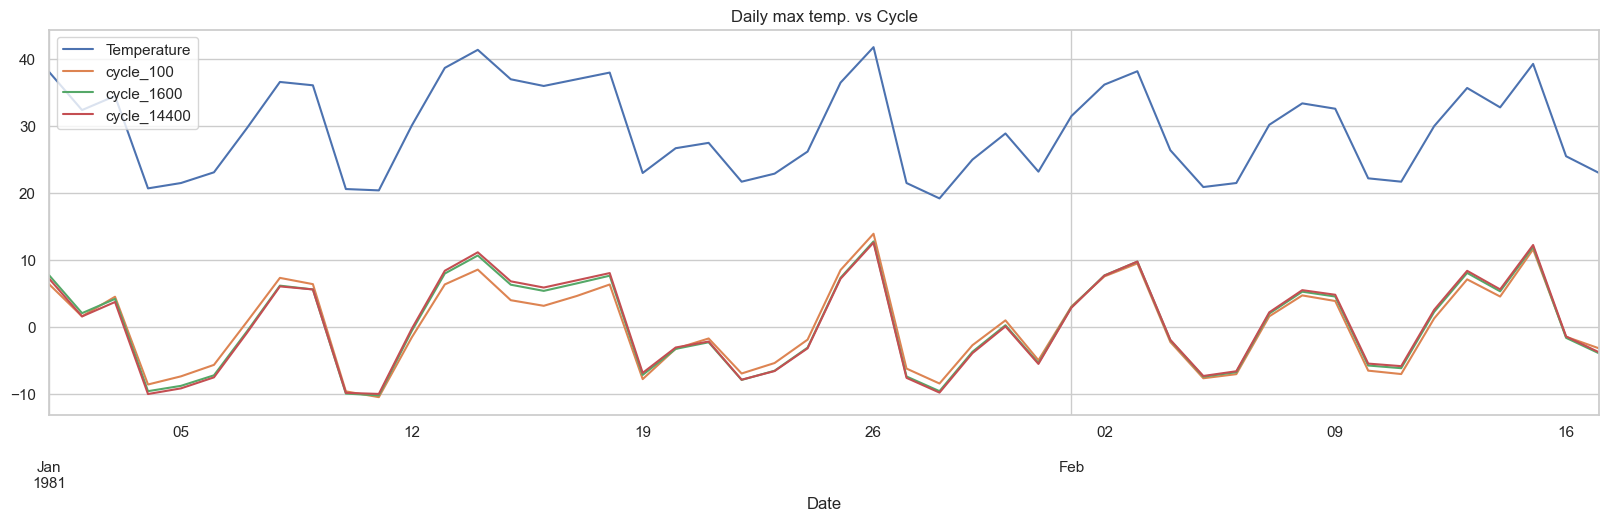

In [21]:
df_max_temp[['Temperature', 'cycle_100', 'cycle_1600', 'cycle_14400']].iloc[:48].plot(title='Daily max temp. vs Cycle', figsize=(20, 5))

# Descomposición ETS (Error-Trend-Seasonality)

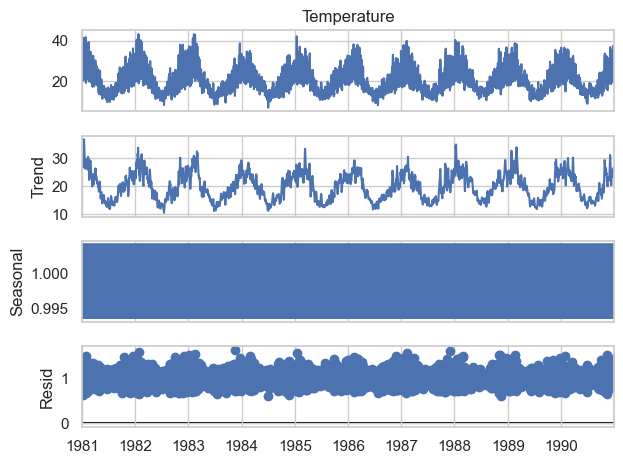

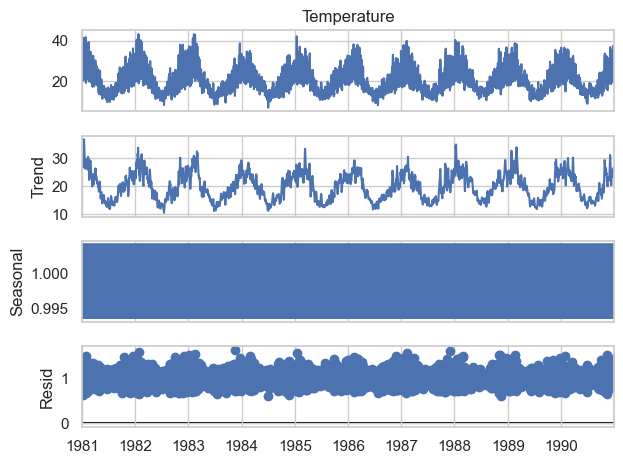

In [154]:
df_max_temp = df_max_temp.asfreq('D')
result = seasonal_decompose(df_max_temp['Temperature'], model='multiplicative')
result.plot()

# SMA (Simple Moving Average)

In [57]:
df_max_temp['3-month-SMA'] = df_max_temp['Temperature'].rolling(window = 3).mean()
df_max_temp['6-month-SMA'] = df_max_temp['Temperature'].rolling(window = 6).mean()
df_max_temp['12-month-SMA'] = df_max_temp['Temperature'].rolling(window = 12).mean()
df_max_temp['24-month-SMA'] = df_max_temp['Temperature'].rolling(window = 24).mean()

<Axes: xlabel='Date'>

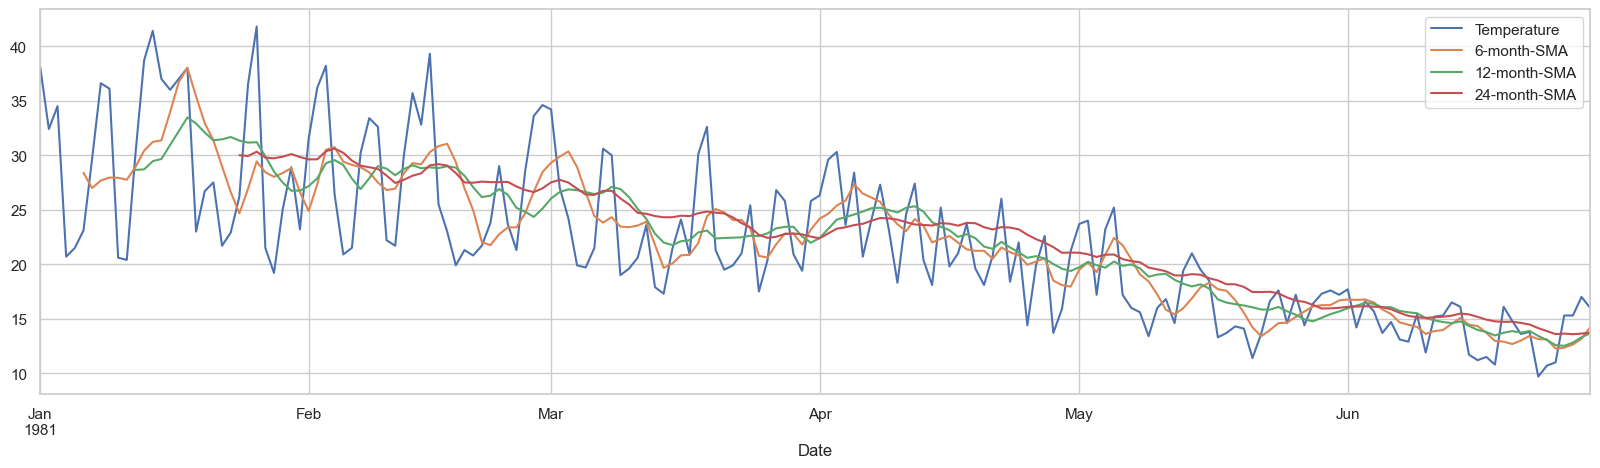

In [70]:
df_max_temp[['Temperature','6-month-SMA','12-month-SMA', '24-month-SMA']].iloc[:180].plot(figsize=(20, 5))

# SES (Simple Exponential Smooting)

In [69]:
span = 12
alpha = 2/(span+1)

In [73]:
df_max_temp['SES6'] = SimpleExpSmoothing(df_max_temp['Temperature']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df_max_temp['SES12'] = SimpleExpSmoothing(df_max_temp['Temperature']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df_max_temp['SES24'] = SimpleExpSmoothing(df_max_temp['Temperature']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

<Axes: title={'center': 'Daily max temperature vs SMA'}, xlabel='Date'>

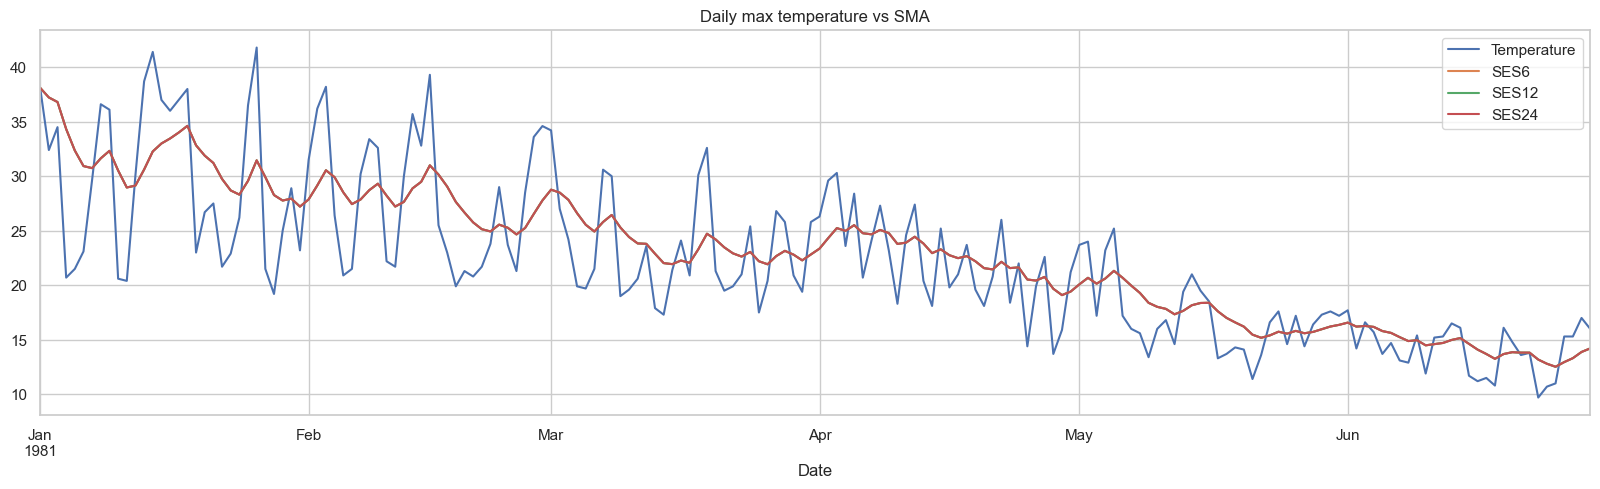

In [76]:
df_max_temp[['Temperature', 'SES6', 'SES12', 'SES24']].iloc[:180].plot(title='Daily max temperature vs SMA', figsize=(20, 5))

# DES (Double Exponential Smoothing)

In [80]:
df_max_temp['DESadd'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='add').fit().fittedvalues.shift(-1)
df_max_temp['DESmul'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='mul').fit().fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Date'>

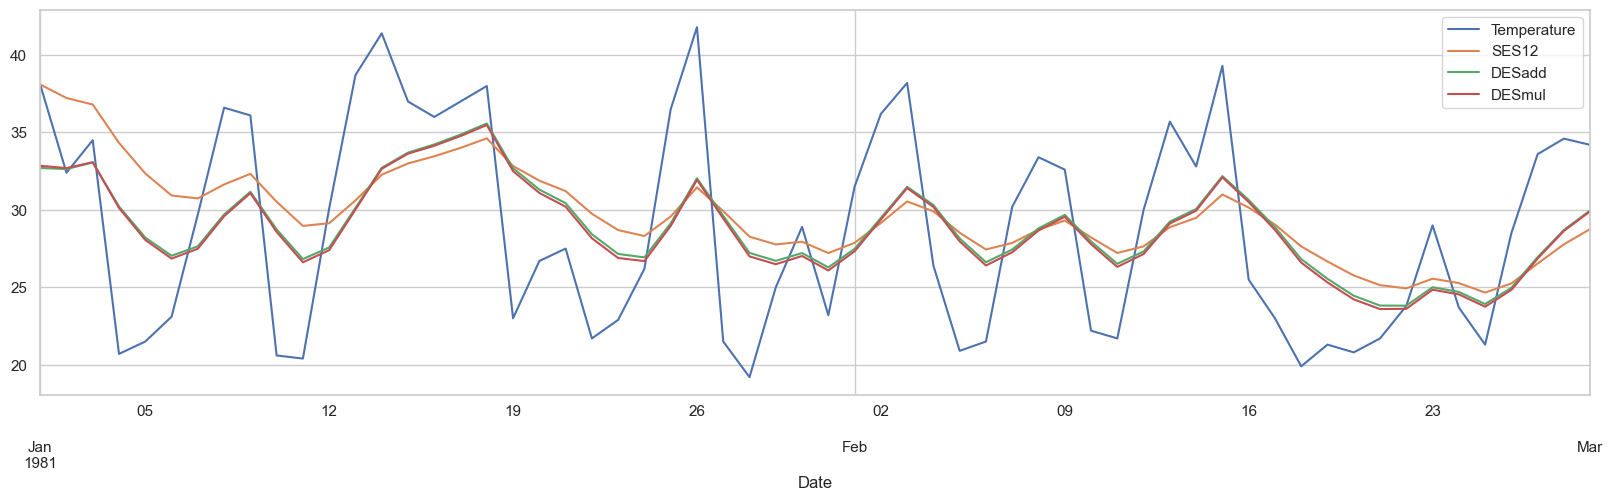

In [84]:
df_max_temp[['Temperature','SES12','DESadd','DESmul']].iloc[:60].plot(figsize=(20,5))

# TES (Triple Exponential Smoothing)

### Additive

In [160]:
df_max_temp['TESadd6'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='add',seasonal='add',seasonal_periods=6).fit().fittedvalues.shift(-1)
df_max_temp['TESadd12'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
df_max_temp['TESadd24'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='add',seasonal='add',seasonal_periods=24).fit().fittedvalues.shift(-1)

<Axes: xlabel='Date'>

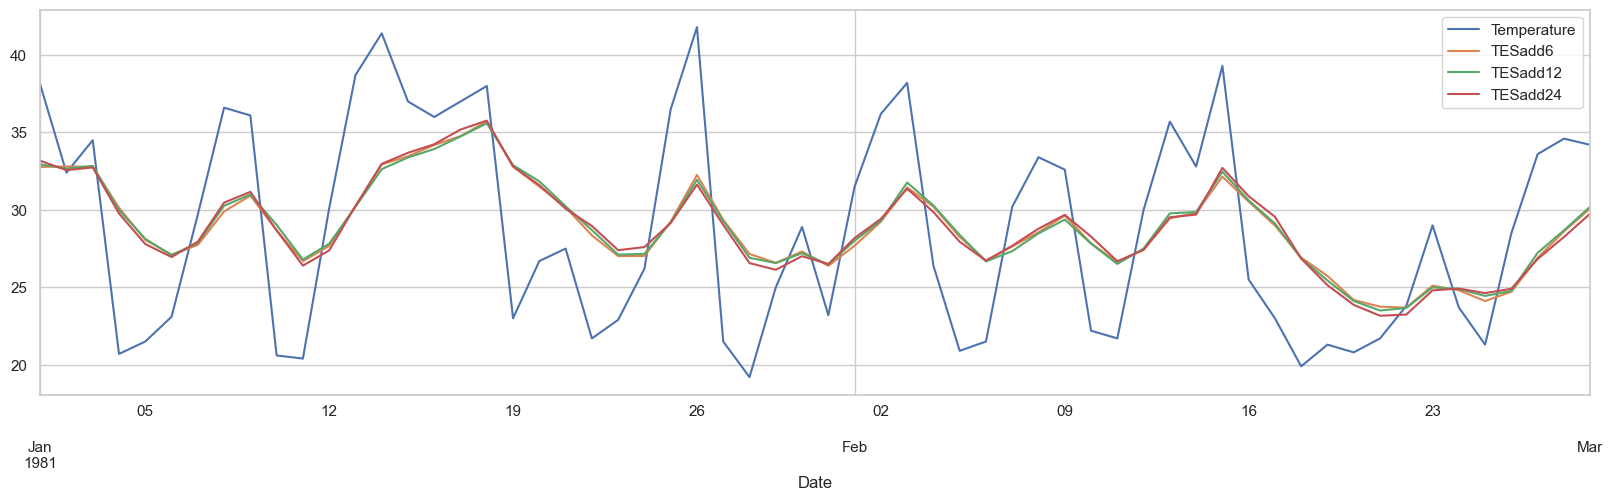

In [161]:
df_max_temp[['Temperature','TESadd6', 'TESadd12', 'TESadd24']].iloc[:60].plot(figsize=(20,5))

### Multiplicative

In [86]:
df_max_temp['TESmul6'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='mul', seasonal='mul',seasonal_periods=6).fit().fittedvalues.shift(-1)
df_max_temp['TESmul12'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df_max_temp['TESmul24'] = ExponentialSmoothing(df_max_temp['Temperature'],trend='mul', seasonal='mul',seasonal_periods=24).fit().fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Date'>

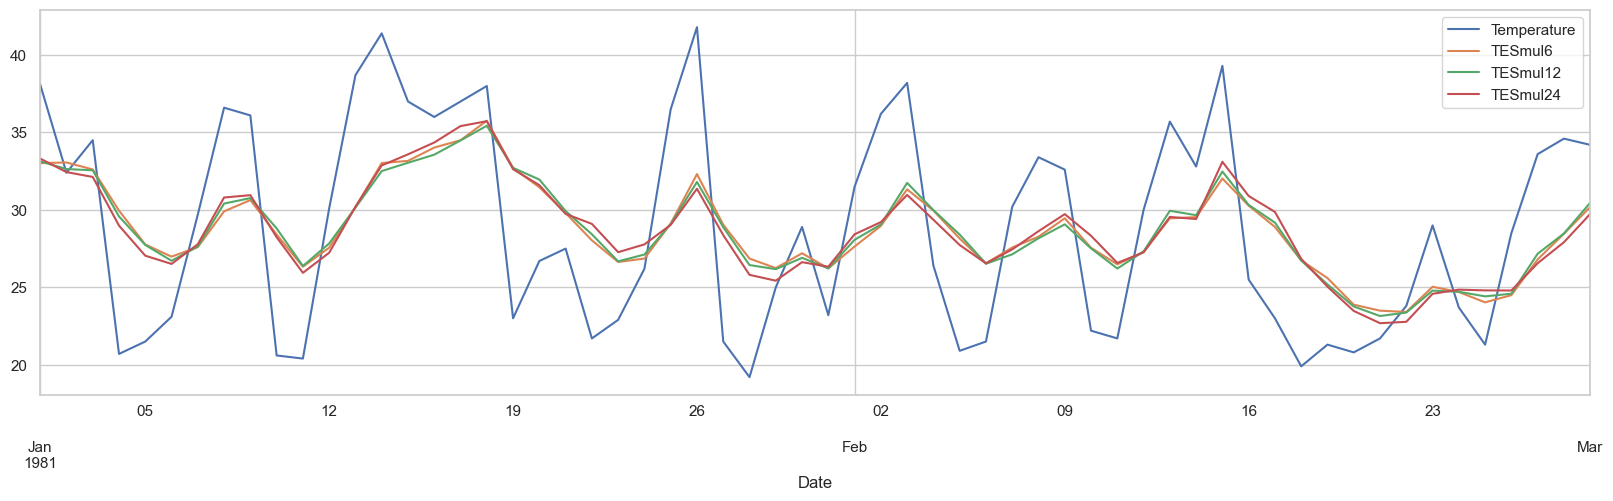

In [89]:
df_max_temp[['Temperature','TESmul6', 'TESmul12', 'TESmul24']].iloc[:60].plot(figsize=(20,5))

# Pronósticos (Forecasting)

In [92]:
df_max_temp_train_data = df_max_temp.iloc[0:3000]
df_max_temp_test_data = df_max_temp.iloc[3000:]

In [190]:
df_max_temp_add_fitted_model = ExponentialSmoothing(df_max_temp_train_data['Temperature'], trend='add', seasonal='add', seasonal_periods=12).fit()
df_max_temp_mul_fitted_model = ExponentialSmoothing(df_max_temp_train_data['Temperature'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [191]:
df_max_temp_add_test_predictions = df_max_temp_add_fitted_model.forecast(732)
df_max_temp_mul_test_predictions = df_max_temp_mul_fitted_model.forecast(732)

In [192]:
df_max_temp_add_test_predictions.sample(15)

1990-08-05    20.961090
1989-04-27    22.220907
1989-01-10    22.420674
1989-05-09    22.187679
1990-12-10    20.730185
1990-08-04    21.155257
1989-12-04    21.816800
1989-02-23    22.423132
1990-01-13    21.525970
1989-03-23    22.221304
1989-10-19    21.524912
1989-05-19    22.470100
1990-08-13    21.119007
1990-09-04    20.846545
1990-06-30    21.060774
dtype: float64

<Axes: xlabel='Date'>

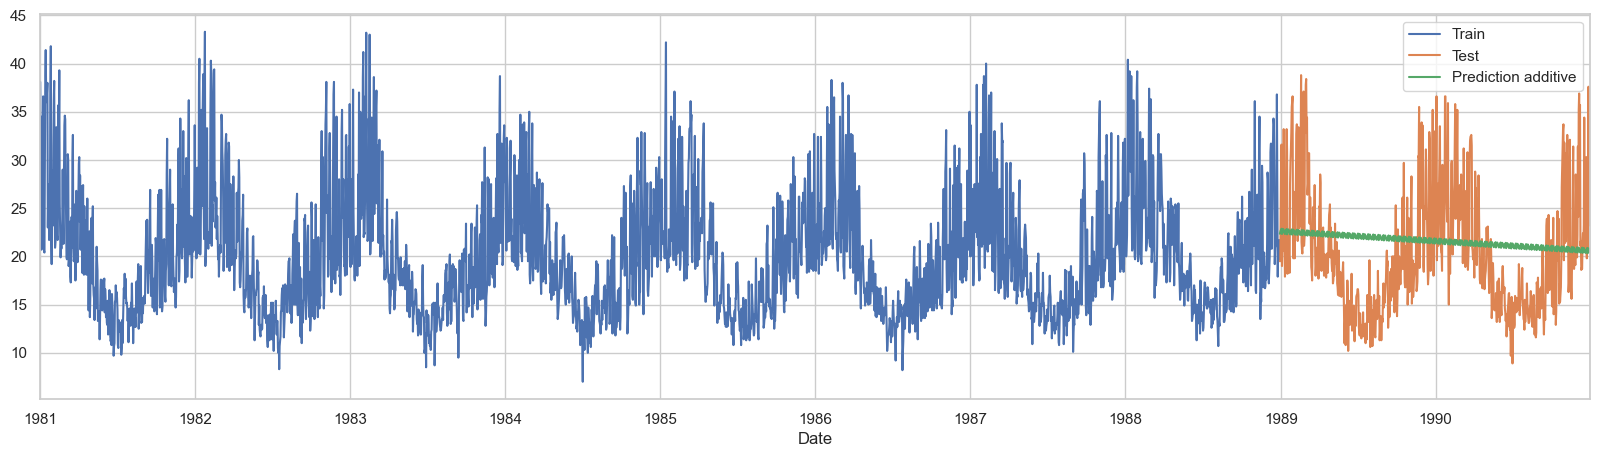

In [193]:
df_max_temp_train_data['Temperature'].plot(legend = True, label = 'Train')
df_max_temp_test_data['Temperature'].plot(legend = True, label = 'Test')
df_max_temp_add_test_predictions.plot(legend = True, label = 'Prediction additive', figsize=(20,5))

<Axes: xlabel='Date'>

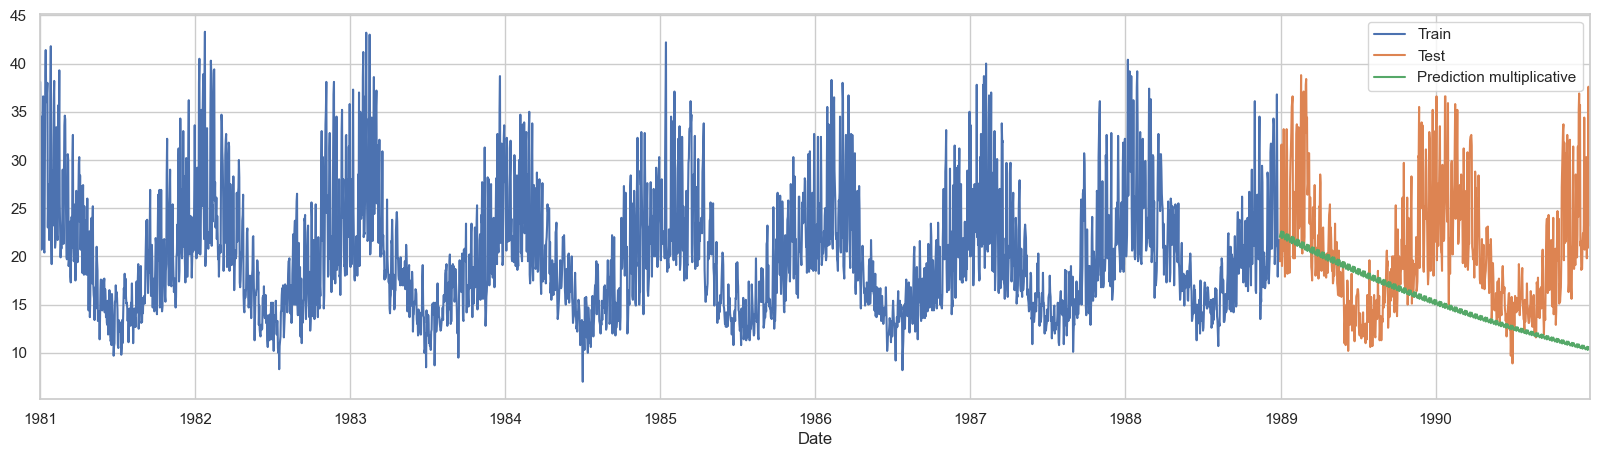

In [194]:
df_max_temp_train_data['Temperature'].plot(legend = True, label = 'Train')
df_max_temp_test_data['Temperature'].plot(legend = True, label = 'Test')
df_max_temp_mul_test_predictions.plot(legend = True, label = 'Prediction multiplicative', figsize=(20,5))

# Métricas de evaluación

In [180]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

Additive

In [188]:
mean_absolute_error(df_max_temp_test_data['Temperature'], df_max_temp_add_test_predictions)

np.float64(5.212233631288069)

In [189]:
mean_squared_error(df_max_temp_test_data['Temperature'], df_max_temp_add_test_predictions)

np.float64(39.249115470990056)

Multiplicative

In [195]:
mean_absolute_error(df_max_temp_test_data['Temperature'], df_max_temp_mul_test_predictions)

np.float64(6.164639099524137)

In [196]:
mean_squared_error(df_max_temp_test_data['Temperature'], df_max_temp_mul_test_predictions)

np.float64(66.25147454250715)